Problem Statement No. 08
1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset
Use :Social_Network_Ads.csv

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

In [29]:
df = pd.read_csv("data/Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [33]:
df.drop(inplace=True, columns=['User ID'], axis=1)

<Axes: >

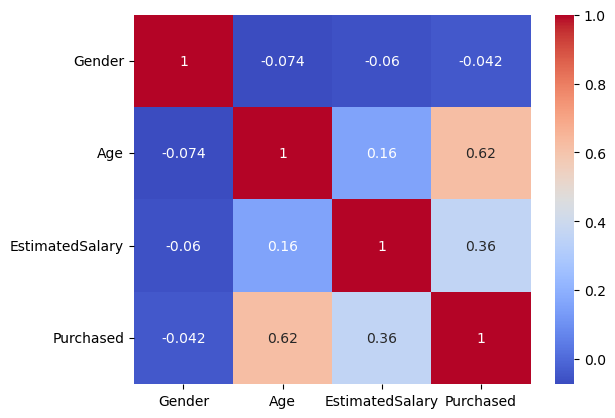

In [34]:
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

In [35]:
x = df.drop("Purchased", axis=1)
y = df["Purchased"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy: How often is the classifier right? <br>
Precision: Out of all predicted positives, how many were actually correct? <br>
Recall: Out of all actual positives, how many did we correctly predict?

In [37]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("accuracy: ", acc)
print("precision: ", pre)
print("recall: ", rec)

accuracy:  0.8875
precision:  0.9130434782608695
recall:  0.75


<Axes: >

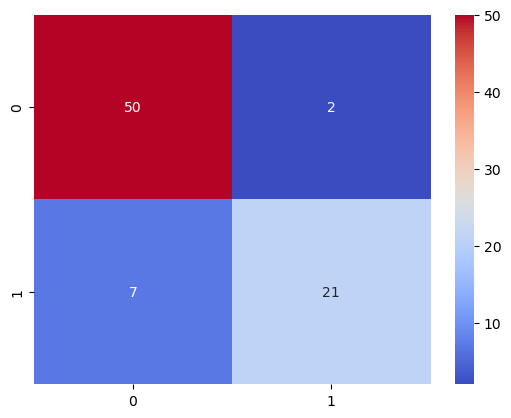

In [38]:
sns.heatmap(cm, annot=True, cmap="coolwarm")

Logeistic Regression: Focuses on drawing the best line/boundary to separate classes